This notebook examines how the identifiability transform impacts selection profiles of the tuning and coupling parameters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import neurobiases

from importlib import reload
from neurobiases import TriangularModel, TCSolver, EMSolver
from neurobiases import utils, plot
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# create triangular model kwargs
# importantly, we apply some sparsity to both sets of parameters
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_piecewise_kwargs(M=48, N=25, K=1,
                                              corr_cluster=0.3, corr_back=0.0,
                                              tuning_sparsity=0.6, coupling_sparsity=0.5,
                                              tuning_random_state=233332, coupling_random_state=2)

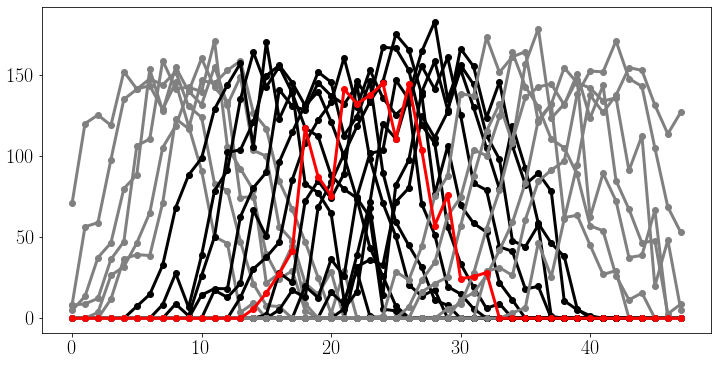

In [3]:
# create triangular model and examine tuning curves
tm = TriangularModel(
    model='linear',
    parameter_design='piecewise',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs
)
tm.plot_tuning_curves(neuron='all')
plt.show()

In [4]:
n_deltas = 1000
deltas = np.linspace(-100, 100, n_deltas)
a_start = tm.a.ravel()
b_start = tm.b.ravel()
a_coefs = np.zeros((n_deltas, tm.N))
b_coefs = np.zeros((n_deltas, tm.M))

In [5]:
# calculate tuning/coupling parameters for each identifiability parameters
for idx, delta in enumerate(deltas):
    a, b, _, _ = tm.identifiability_transform(delta=delta, update=False)
    a_coefs[idx] = a.ravel()
    b_coefs[idx] = b.ravel()

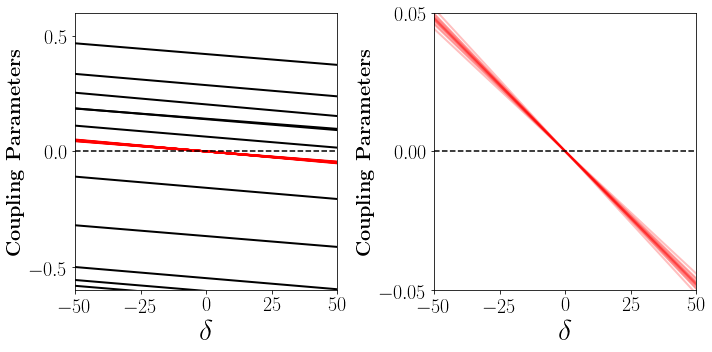

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# iterate over coupling parameters
for idx in range(tm.N):
    # plot parameters chosen to be zero separately
    if a_start[idx] == 0:
        color = 'red'
        axes[1].plot(
            deltas, a_coefs[:, idx],
            color=color,
            alpha=0.25,
            linewidth=2)
    else:
        color = 'black'
    # plot trajectory of parameter over delta
    axes[0].plot(deltas, a_coefs[:, idx],
                 color=color,
                 alpha=1,
                 linewidth=2)
    
axes[0].set_ylim([-0.6, 0.6])
axes[0].set_yticks([-0.5, 0, 0.5])
axes[1].set_ylim([-0.05, 0.05])
axes[1].set_yticks([-0.05, 0, 0.05])

for ax in axes:
    ax.set_xlim([-50, 50])
    ax.axhline(0, color='black', linestyle='--')
    ax.set_xlabel(r'$\delta$', fontsize=30)
    ax.set_ylabel(r'\textbf{Coupling Parameters}', fontsize=20)

plt.tight_layout()
plt.savefig('coupling_vs_identifiability_transform.pdf', bbox_inches='tight')

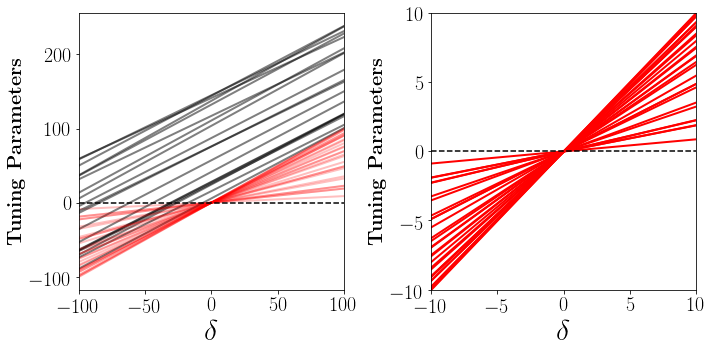

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# iterate over tuning parameters
for idx in range(tm.M):
    # plot parameters chosen to be zero separately
    if b_start[idx] == 0:
        color = 'red'
        alpha = 0.25
        axes[1].plot(deltas, b_coefs[:, idx],
             color=color,
             alpha=1,
             linewidth=2)
    else:
        color = 'black'
        alpha = 0.5
    # plot trajectory of parameter over delta
    axes[0].plot(deltas, b_coefs[:, idx],
                 color=color,
                 alpha=alpha,
                 linewidth=2)
    
axes[0].set_xlim([-100, 100])
axes[1].set_xlim([-10, 10])
axes[1].set_ylim([-10, 10])

for ax in axes:
    ax.axhline(0, color='black', linestyle='--')
    ax.set_xlabel(r'$\delta$', fontsize=30)
    ax.set_ylabel(r'\textbf{Tuning Parameters}', fontsize=20)

plt.tight_layout()
plt.savefig('tuning_vs_identifiability_transform.pdf', bbox_inches='tight')

Repeat above experiment but with no sparsity in either the tuning or coupling parameters.

In [12]:
# create triangular model kwargs
# importantly, we apply some sparsity to both sets of parameters
tuning_kwargs, coupling_kwargs, noise_kwargs, stim_kwargs = \
    TriangularModel.generate_piecewise_kwargs(M=48, N=25, K=1,
                                              corr_cluster=0.3, corr_back=0.0,
                                              tuning_sparsity=0.0, coupling_sparsity=0.0,
                                              tuning_random_state=233332, coupling_random_state=2)

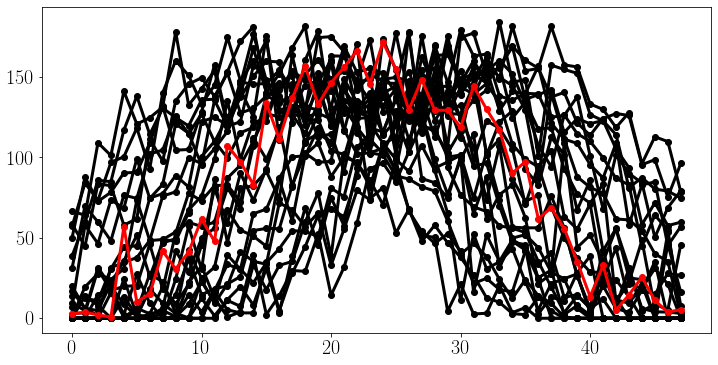

In [13]:
# create triangular model and examine tuning curves
tm = TriangularModel(
    model='linear',
    parameter_design='piecewise',
    tuning_kwargs=tuning_kwargs,
    coupling_kwargs=coupling_kwargs,
    noise_kwargs=noise_kwargs,
    stim_kwargs=stim_kwargs
)
tm.plot_tuning_curves(neuron='all')
plt.show()

In [14]:
n_deltas = 1000
deltas = np.linspace(-1000, 1000, n_deltas)
a_start = tm.a.ravel()
b_start = tm.b.ravel()
a_coefs = np.zeros((n_deltas, tm.N))
b_coefs = np.zeros((n_deltas, tm.M))

In [15]:
# calculate tuning/coupling parameters for each identifiability parameters
for idx, delta in enumerate(deltas):
    a, b, _, _ = tm.identifiability_transform(delta=delta, update=False)
    a_coefs[idx] = a.ravel()
    b_coefs[idx] = b.ravel()

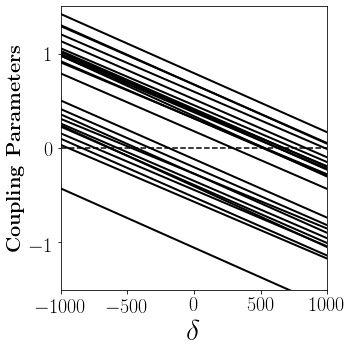

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# iterate over coupling parameters
for idx in range(tm.N):
    # plot trajectory of parameter over delta
    ax.plot(deltas, a_coefs[:, idx],
                 color='black',
                 alpha=1,
                 linewidth=2)
    
ax.set_ylim([-1.5, 1.5])
ax.set_yticks([-1, 0, 1])

ax.set_xlim([-1000, 1000])
ax.axhline(0, color='black', linestyle='--')
ax.set_xlabel(r'$\delta$', fontsize=30)
ax.set_ylabel(r'\textbf{Coupling Parameters}', fontsize=20)

plt.tight_layout()
plt.savefig('coupling_vs_identifiability_transform_no_sparsity.pdf', bbox_inches='tight')

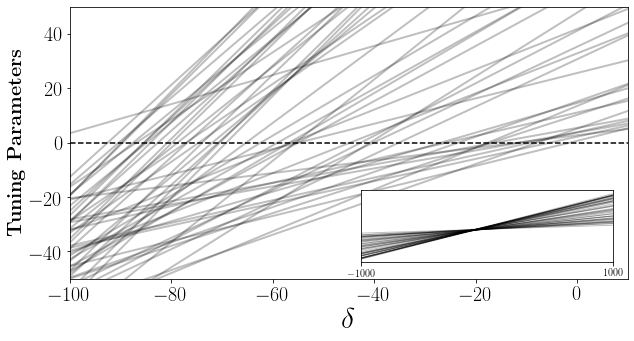

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
inset = fig.add_axes([0.53, 0.17, 0.35, 0.2])

# iterate over tuning parameters
for idx in range(tm.M):
    # plot trajectory of parameter over delta
    ax.plot(deltas, b_coefs[:, idx],
            color='black',
            alpha=alpha,
            linewidth=2)
    inset.plot(deltas, b_coefs[:, idx],
               color='black',
               alpha=alpha,
               linewidth=1)

ax.set_xlim([-100, 10])
ax.set_ylim([-50, 50])
ax.axhline(0, color='black', linestyle='--')
ax.set_xlabel(r'$\delta$', fontsize=30)
ax.set_ylabel(r'\textbf{Tuning Parameters}', fontsize=20)
inset.set_xlim([-1000, 1000])
inset.set_xticks([-1000, 1000])
inset.set_yticks([])
inset.tick_params(labelsize=10)
plt.savefig('tuning_vs_identifiability_transform_no_sparsity.pdf', bbox_inches='tight')